In [2]:
# Import libraries and verify current directory
execfile("startup.py")
execfile("covid_fns.py")

current_dir = os.getcwd()
print(current_dir)

# Read data and create list of dfs

covidcsv = ["Case.csv", "PatientInfo.csv", "Policy.csv", "Region.csv", "SearchTrend.csv", "SeoulFloating.csv", "Time.csv", "TimeAge.csv", "TimeGender.csv", "TimeProvince.csv", "Weather.csv"]
df_names = ["case", "pt_info", "policy", "region", "trend", "seoulfloating", "time", "timeage", "timegender", "timeprov", "weather"]



ModuleNotFoundError: No module named 'rbcde'

In [3]:
covidfiles = ["Case.csv", "PatientInfo.csv", "Policy.csv", "Region.csv", "SearchTrend.csv", "SeoulFloating.csv", "Time.csv", "TimeAge.csv", "TimeGender.csv", "TimeProvince.csv", "Weather.csv"]
for file in covidfiles:
    df = pd.read_csv(file, index_col=0, header=0)
    print(f"\n{file.upper()}")
    pprint.pprint(df.isnull().sum())






CASE.CSV


NameError: name 'pprint' is not defined

In [4]:
df = pd.read_csv("PatientInfo.csv", index_col=0, header=0)

for col in df:
    tot_missing = df.isnull().sum()
    print(f"{df[col].upper()}: {tot_missing}")



AttributeError: 'Series' object has no attribute 'upper'

df_names = ["case", "pt_info", "policy", "region", "trend", "seoulfloating", "time", "timeage", "timegender", "timeprov", "weather"]

#### *Data cleaning findings

2 tables with missing:
	- Patient info 
    
EDA
	- 174 cases

* 5165 observations (each represents a patient) and 13 variables
* No data coded as missing


In [7]:
from scipy.stats import chisquare

# https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas

# Subset dataframe to non (see below correlation table)
coursera_num = coursera.iloc[:, 2:7]
coursera_num.drop("course_students_enrolled", axis=1, inplace=True)

# Convert categorical variables to numeric
# coursera["cert_type"] = pd.factorize(coursera["cert_type"])[0]

coursera_num.info()

# corr_matrix = coursera.corr(method=lambda x, y: kendalltau(x, y)[0] if x.dtype == 'int64' and y.dtype == 'int64' else spearmanr(x, y)[0], min_periods=1)

# spotifynum.corr(method="spearman")
# display(spotCorr.style.background_gradient(cmap="Blues", axis=None))

# # 2.19 Which features are strongly positively correlated?

# hiposcorr = spotCorr[(spotCorr > 0.8) & (spotCorr < 1.0)].stack().round(2)
# print(f"Strong positive correlation: {hiposcorr}")

# # 2.20 Which features are strongly negatively correlated?
# hinegcorr = spotCorr[(spotCorr < -0.8)].stack().round(2)
# print(f"Strong negative correlation: {hinegcorr}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cert_type       891 non-null    object 
 1   rating          891 non-null    float64
 2   difficulty      891 non-null    object 
 3   num_enrolled_k  891 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 28.0+ KB


In [ ]:
# word count using plotly

import plotly.graph_objs as go

# df = df.reset_index().drop('index', axis=1, errors='ignore')
coursera.columns = [
    str(c) for c in coursera.columns
]  # update columns to strings in case they are numbers

s = coursera[~pd.isnull(coursera["title"])]["title"]
chart = pd.value_counts(s.str.split(expand=True).stack())
chart = chart.to_frame(name="data").sort_index()
chart.index.name = "labels"
chart = chart.reset_index().sort_values(["data", "labels"], ascending=[False, True])
chart = chart[:100]
charts = [go.Bar(x=chart["labels"].values, y=chart["data"].values, name="Frequency")]
figure = go.Figure(
    data=charts,
    layout=go.Layout(
        {
            "barmode": "group",
            "legend": {"orientation": "h"},
            "title": {"text": "title Word Value Counts"},
            "xaxis": {"title": {"text": "title"}},
            "yaxis": {"title": {"text": "Frequency"}},
        }
    ),
)

In [ ]:
# attempts to read multiple files, keep names and hold them in memory without repeating lines

path = os.getcwd()
filenames = os.listdir(path)

covid_lst = []
# for loop iterates through all directories and files in alphabetical order:
for file in filenames: 
    if file.endswith(".csv"):
        df = pd.read_csv(file, index_col=0, header=0)
        df_names[filenames.index(file)] = df
        print(file)

# df_names[filenames.index(file)] = pd.read_csv(file, index_col=0, header=0)

In [ ]:
# df = pd.read_csv(file, index_col=0, header=0)
# df_names[filenames.index(file)] = df
# print(file)

# df_names[filenames.index(file)] = pd.read_csv(file, index_col=0, header=0)

In [ ]:
# attempts to read multiple files, keep names and hold them in memory without repeating lines

path = os.getcwd()
filenames = os.listdir(path)

# for loop iterates through all directories and files in alphabetical order:

for i in df_names:
    df_names[i] = pd.read_csv(covidcsv[df_names.index(i)], index_col=0, header=0)



In [ ]:
# Try folium

import folium
m = folium.Map()
m.save("footprint.html")

In [ ]:
# Code to convert date column to datetime format
# Replace blank spaces with missing values
pt_info["symptom_onset_date"] = pt_info["symptom_onset_date"].replace(" ", pd.NaT)

# Convert to datetime format
pt_info["symptom_onset_date"] = pd.to_datetime(pt_info["symptom_onset_date"], format="%d-%m-%Y")


In [1]:
import pandas as pd

# Create a list of dates
dates = ['2023-06-07', '2023-06-08', '2023-06-09']

# Create a DatetimeIndex object from the list of dates
datetime_index = pd.DatetimeIndex(dates)

# Index a DataFrame using the DatetimeIndex object
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df.index = datetime_index

# Print the DataFrame
print(df)

            A  B
2023-06-07  1  4
2023-06-08  2  5
2023-06-09  3  6


In [5]:
import seaborn as sns
import pandas as pd

pt_info = pd.read_csv("PatientInfo.csv", header=0, parse_dates=["symptom_onset_date", "confirmed_date", "released_date", "deceased_date"], dayfirst = True)
chart_data = pd.concat([
    df['age'],
    df['patient_id'],
    df['sex'],
], axis=1)

df = pd.DataFrame({
    'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
    'morning_customers': [100, 130, 150, 120, 170],
    'evening_customers': [200, 230, 250, 220, 270]
})

sns.set_style('whitegrid')
sns.countplot(x='age', hue='sex', data=chart_data, palette=['#e74c3c', '#2ecc71'], dodge=False)

plt.title('(sex: female) - patient_id by age')
plt.xlabel('Age groups')
plt.ylabel('patient_id')

plt.show()

KeyError: 'patient_id'

In [ ]:
# subset age and sex columns for barchart

x, y, hue = "age", "proportion", "sex"
# hue_order = ["Male", "Female"]
sns.countplot(data=chart_data, x='age', hue='sex', order = ["0s","10s","20s","30s","40s","50s","60s","70s", "80s","90s", "100s", "-1"])

# plt.xlabels
plt.xticks(rotation=45);

In [ ]:
# Recode missing values into -1 (see copy() solution)

chart_data = pt_info[["age", "sex"]].copy()

for col in chart_data:
    chart_data[col].fillna("-1", inplace=True)

<Axes: xlabel='location'>

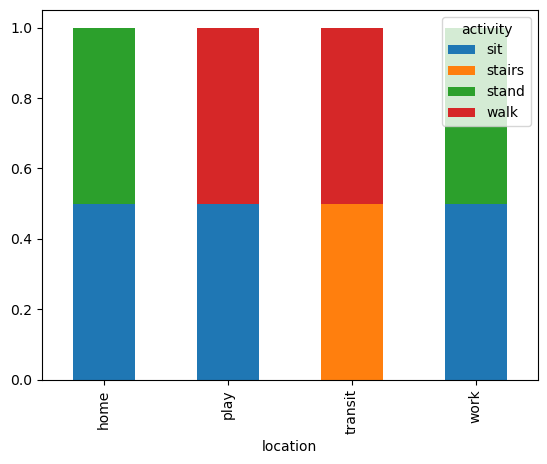

In [9]:
# stackoverflow on stacked bars in pandas: https://stackoverflow.com/questions/56251848/how-do-i-make-pandas-catagorical-stacked-bar-chart-scale-to-100

import pandas as pd
import numpy as np
df = pd.DataFrame({'location': 2*['home', 'work', 'play', 'transit'],'activity': ['sit', 'stand', 'sit', 'walk','stand','sit','walk','stairs'],'value': np.random.randint(0, int(1e2),8)})
df_pct = (df.groupby(['location','activity'])['value'].count()/df.groupby(['location'])['value'].count())

df_pct.unstack().plot.bar(stacked=True)

In [4]:
df

,Class,STRAT,value
0,a,x,45
1,b,y,33
2,c,x,91
3,d,z,75
4,a,y,80
5,b,x,22
6,c,z,86
7,d,w,59


In [25]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [24]:
display(total)
display(smoker)

,day,total_bill
0,Thur,100.0
1,Fri,100.0
2,Sat,100.0
3,Sun,100.0


,day,total_bill
0,Thur,29.757464
1,Fri,77.390450
2,Sat,50.248538
3,Sun,28.164409


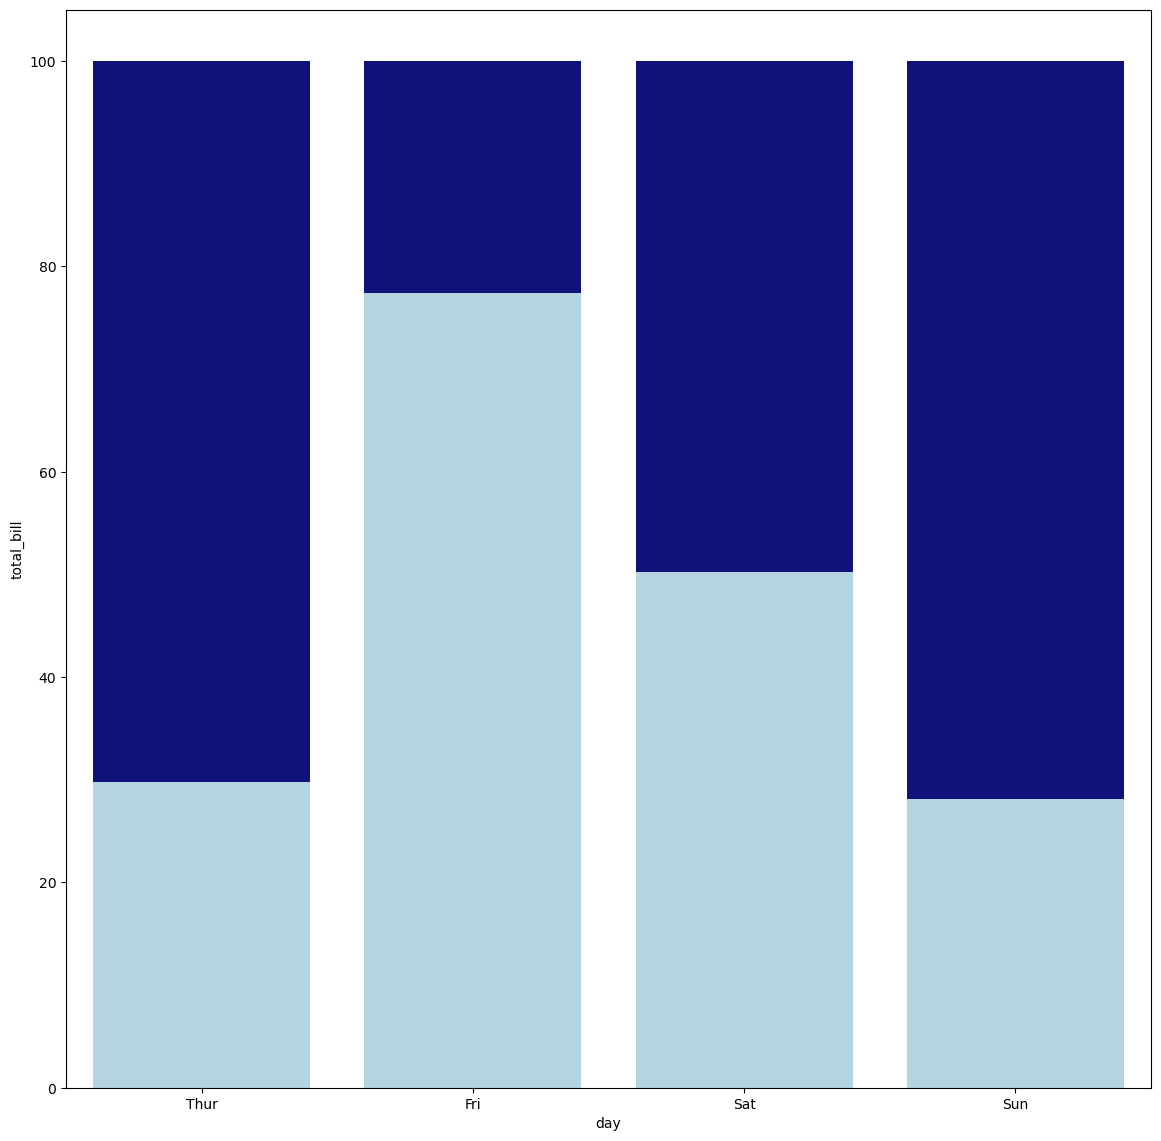

In [32]:
# Stacked barchart in seaborn

# import libraries
import matplotlib.patches as mpatches

# load dataset
tips = sns.load_dataset("tips")

# set the figure size
plt.figure(figsize=(14, 14))

# from raw value to percentage
total = tips.groupby('day')['total_bill'].sum().reset_index() # total tips for each day of the week
smoker = tips[tips.smoker=='Yes'].groupby('day')['total_bill'].sum().reset_index() # total tips from smokers for each day of the week 
smoker['total_bill'] = [i / j * 100 for i,j in zip(smoker['total_bill'], total['total_bill'])] # changed total_bill in smoker table into  % of tips from smokers for each day of the week 
total['total_bill'] = [i / j * 100 for i,j in zip(total['total_bill'], total['total_bill'])] # changed total_bill in total table into %s (all 100%)

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue') # returns 100% bars
# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

In [1]:

# Stacked bar sex and age KEEP for reference

sns.set_theme(style="whitegrid", palette="muted")
import matplotlib.patches as mpatches

# set the figure size
plt.figure(figsize=(6, 8))

# top bar -> sum all values (male and female) to find y position of the bars
total = pt_info.groupby("age")["patient_id", "state"].count().reset_index()

total
# bar chart 1 -> top bars (everyone)
bar1 = sns.barplot(
    x="age",
    y="patient_id",
    data=total,
    color="darkblue",
    order=[
        "0s",
        "10s",
        "20s",
        "30s",
        "40s",
        "50s",
        "60s",
        "70s",
        "80s",
        "90s",
        "100s",
        "-1",
    ],
)

ylabel = "Total patients"
plt.ylabel(ylabel)

# bottom bar ->  take only sex = female values from the data
female = pt_info[pt_info["sex"] == "female"]
total_f = female.groupby("age")["patient_id"].count().reset_index()

# bar chart 2 -> bottom bars (group of 'sex = female')
bar2 = sns.barplot(
    x="age",
    y="patient_id",
    data=total_f,
    estimator=sum,
    errorbar=None,
    color="lightblue",
    order=[
        "0s",
        "10s",
        "20s",
        "30s",
        "40s",
        "50s",
        "60s",
        "70s",
        "80s",
        "90s",
        "100s",
        "-1",
    ],
)

plt.ylabel("Total cases")

top_bar = mpatches.Patch(color="darkblue", label="Male")
bottom_bar = mpatches.Patch(color="lightblue", label="Female")
plt.legend(handles=[top_bar, bottom_bar])

NameError: name 'sns' is not defined

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Create example DataFrame
age_sex_st = pd.DataFrame({
    "age": [10, 10, 20, 20, 30, 30],
    "sex": ["male", "female", "male", "female", "male", "female"],
    "state": ["isolated", "discharged", "isolated", "dead", "discharged", "dead"],
    "counts": [10, 20, 30, 40, 50, 60]
})

# Group by age group and sex
age_sex_stg = (
    age_sex_st.groupby(["age", "sex"])
    .apply(lambda x: x / x.sum())
    .reset_index(drop=True)
)



TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [3]:
# Pivot table to get counts by age group, sex, and state
age_sex_stg_pivot = (
    age_sex_stg.pivot_table(
        index="age",
        columns=["sex", "state"],
        values="counts",
        aggfunc="sum",
        fill_value=0
    )
)

# Normalize counts to get percentages
age_sex_stg_pivot_norm = (
    age_sex_stg_pivot.div(age_sex_stg_pivot.sum(axis=1), axis=0)
)

# Create stacked bar chart
ax = age_sex_stg_pivot_norm.plot(kind="bar", stacked=True)

# Set axis labels and title
ax.set_xlabel("Age")
ax.set_ylabel("Percentage")
ax.set_title("COVID Patients by Age Group, Sex, and State")

# Show plot
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [ ]:
# Save for future attempt on producing grouped (state) and stacked (sex) columns 

age_sex_stg = (
    age_sex_st.groupby(["age", "state", "sex"]).size().reset_index(name="counts")
)

age_sex_stg

In [1]:
# creates dictionary with dfs for each of 3 states

df_by_state = {}
for i in order:
    df_by_state[i] = age_sex_st[age_sex_st["state"] == i]
    print(f"{i}: \n{df_by_state} \n")
    plot_dist_by_age_and_gender(age_sex_st, i, i + " cases")

NameError: name 'order' is not defined

In [ ]:
# Distribution of state plots by age and gender (PREFACTORED)

import matplotlib.gridspec as gs

sns.set_style("whitegrid")
sns.color_palette("deep")

fig, axes = plt.subplots(
    1,
    3,
    figsize=(15, 6),
)


# for deceased group, calculate proportion for each gender within each age group

deceased = pd.DataFrame(df_by_state["deceased"])
deceased_ct = (
    deceased.groupby("age")["sex"].value_counts().rename("count").reset_index()
)

# plot
sns.barplot(
    data=deceased_ct,
    x="age",
    y="count",
    hue="sex",
    order=[
        "0s",
        "10s",
        "20s",
        "30s",
        "40s",
        "50s",
        "60s",
        "70s",
        "80s",
        "90s",
        "100s",
        "-1",
    ],
    ax=axes[0],
    palette=["lightgrey", "#CD2E3A", "#0047A0"],
).set(title="Deceased cases")
axes[0].legend_.remove()

# for released group, calculate proportion for each gender within each age group

released = pd.DataFrame(df_by_state["released"])

released_ct = (
    released.groupby("age")["sex"].value_counts().rename("count").reset_index()
)

# plot
sns.barplot(
    data=released_ct,
    x="age",
    y="count",
    hue="sex",
    order=[
        "0s",
        "10s",
        "20s",
        "30s",
        "40s",
        "50s",
        "60s",
        "70s",
        "80s",
        "90s",
        "100s",
        "-1",
    ],
    ax=axes[1],
    palette=["lightgrey", "#CD2E3A", "#0047A0"],
).set(title="Released cases")
axes[1].legend(loc=(0.5, 0.5))

# for isolated group, calculate proportion for each gender within each age group

isolated = pd.DataFrame(df_by_state["isolated"])

isolated_ct = (
    isolated.groupby("age")["sex"].value_counts().rename("count").reset_index()
)

# plot
sns.barplot(
    data=isolated_ct,
    x="age",
    y="count",
    hue="sex",
    order=[
        "0s",
        "10s",
        "20s",
        "30s",
        "40s",
        "50s",
        "60s",
        "70s",
        "80s",
        "90s",
        "100s",
        "-1",
    ],
    ax=axes[2],
    palette=["lightgrey", "#CD2E3A", "#0047A0"],
).set(title="Isolated cases")
axes[2].legend_.remove()

fig.suptitle(
    "Distribution of Covid cases in each state (isolated, released and deceased), \nby age and sex. Jan-Jun 2020 (Korea CDC)",
    fontsize=14,
    y=1.05,
)

In [ ]:
# Code for putting 2nd axis log scale for lineplot 
ax2 = ax.twinx()
ax2.set_yscale("log")
ax2.set_ylabel("Logarithmic scale")
sns.lineplot(
    data=time,
    x="date",
    y="test_d",
    ax=ax2,
    label="Number of tests (log scale)",
    color="orange",
)
ax.legend(["Nbr of confirmed", "Nbr released from hospital", "Nbr of deceased"])
ax.legend(loc="lower right", bbox_to_anchor=(1.1, 0.45))
ax2.legend(loc="upper left", bbox_to_anchor=(0, 1.02))

In [ ]:
# Age and sex by status

sns.set_style("whitegrid")

fig, axes = plt.subplots(
    1,
    3,
    figsize=(15, 6),
)

for i, status in enumerate(["isolated", "released", "deceased"]):
    # create df from dictionary
    df = pd.DataFrame(df_by_state[status])

    # create variable that counts total by age and sex
    ct = (
        df.groupby("age")["sex"]
        .value_counts(
            normalize=True
        )  # denominator for % should the total in that for sex and age group, but 100% of women in their 30s were not deceased.
        .mul(100)
        .rename("percent")
        .reset_index()
    )

    sns.barplot(
        data=ct,
        x="age",
        y="percent",
        hue="sex",
        order=[
            "0s",
            "10s",
            "20s",
            "30s",
            "40s",
            "50s",
            "60s",
            "70s",
            "80s",
            "90s",
            "100s",
            "-1",
        ],
        ax=axes[i],
        palette=["lightgrey", "#CD2E3A", "#0047A0"],
    ).set(title=f"{status.capitalize()} cases")
    axes[i].set_ylim([0, 100])
    if i != 2:
        axes[i].legend_.remove()
    else:
        axes[i].legend(loc=(0.6, 0.80))

    fig.suptitle(
        "Distribution of Covid cases in each state (isolated, released and deceased), \nby age and sex. Jan-Jun 2020 (Korea CDC)",
        fontsize=14,
        y=1.05,
    )

In [3]:
import pandas as pd
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df["C"] = df["B"].cumsum()

df

,A,B,C
0,1,4,4
1,2,5,9
2,3,6,15


In [ ]:
        
sns.lineplot(
    data=time,
    x="date",
    y="confirmed",
    ax=ax,
    label="Confirmed: Accumulated # of positive results",
    color="red",
)
sns.lineplot(
    data=time,
    x="date",
    y="released",
    ax=ax,
    label="Released: Accumulated # of releases",
    color="blue",
)
sns.lineplot(
    data=time,
    x="date",
    y="deceased",
    ax=ax,
    label="Deceased: Accumulated # of deceases (sic)",
    color="black",
)

ax2 = ax.twinx()
ax2.set_yscale("log")
ax2.set_ylabel("Logarithmic scale")
sns.lineplot(
    data=time,
    x="date",
    y="test",
    ax=ax2,
    label="Test: Accumulated # of tests (log scale)",
    color="orange",
)
ax.legend(loc="lower right", bbox_to_anchor=(1.1, 0.07))
ax2.legend(loc="upper left", bbox_to_anchor=(0, 0.99))

* Confirmed_date and deceased_date may be the two most reliable of the four date variables:
    - Confirmed date
        - diagnosis confirmation typically follows defined public health protocol (eg. second positive PCR test)
        - only 3 observations missing for this variable; thus this dataset appears to contain the population of confirmed cases
    - Deceased date
        - in middle and high income countries, even in the absence of an epidemic, death documentation systems are typically well established (ie. so the death event, though not necessarily the information documented such as cause of death, is typically reliable). For this analysis we will assume mortality data are reasonably complete.


In [ ]:
# Attempt to use function that ended up producing 3 lines
# Read Time.csv data
time = pd.read_csv(
    "Time.csv",
    header=0,
    parse_dates=["date"],
    date_parser=pd.to_datetime,
    dayfirst=True,
)

fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle(
    "Flattening the curve through massive testing",
    fontsize=12,
)

fig.text(
    0.5,
    0.95,
    "\nNumber of tests, Covid+ confirmation tests, patients released from hospital \nand deceased, Jan-Jun 2020",
    fontsize=10,
    ha="center",
    va="center",
)
ax.set_xlabel("Date", size=12)
ax.set_ylabel("Count", size=12)

labels = [
    "Confirmed: Number of positive results",
    "Number released from hospital",
    "Number of deceased",
]
colours = ["red", "blue", "black"]
columns = [0, 1, 2]

def multiple_lineplots(df, x_col, y_cols=None, title=None, label=None, colors=None):
    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    sns.lineplot(data=df, x=x_col, y=y_cols, ax=ax, label=label, color=colors)
    ax.set_title(title)

for col in columns:
    multiple_lineplots(
        df=time,
        x_col="date",
        y_cols=time.columns[col + 4],
        title="test",
        label=labels[col],
        colors=colours[col],
    )

In [ ]:
# use of fn but only saves 3 lines of code

def multiple_lineplots(
    df, x_col, y_cols=None, title=None, label=None, colors=None, fig=None, ax=None
):
    sns.set_style("whitegrid")
    if fig is None or ax is None:
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111)
    sns.lineplot(data=df, x=x_col, y=y_cols, ax=ax, label=label, color=colors)
    ax.set_title(title)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.suptitle(
    "Flattening the curve through massive testing",
    fontsize=12,
)

fig.text(
    0.5,
    0.95,
    "\nNumber of tests, Covid+ confirmation tests, patients released from hospital \nand deceased, Jan-Jun 2020",
    fontsize=10,
    ha="center",
    va="center",
)
ax.set_xlabel("Date", size=12)
ax.set_ylabel("Count", size=12)

labels = [
    "Confirmed: Number of positive results",
    "Number released from hospital",
    "Number of deceased",
]
colours = ["red", "blue", "black"]
columns = [0, 1, 2]

for col in columns:
    multiple_lineplots(
        df=time,
        x_col="date",
        y_cols=time.columns[col + 4],
        title="test",
        label=labels[col],
        colors=colours[col],
        fig=fig,
        ax=ax,
    )

In [ ]:
# 1st step in one attempt to create stacked bars (wide to long)

totals_prov_long = pd.melt(
    totals_prov_wide,
    id_vars="province",
    value_vars=["confirmed", "released", "deceased"],
    var_name="case_type",
    value_name="Number",
)



In [ ]:
# Failed attempt to make stacked columns with sns



# Latest number of confirmed & released & deceased people
fig, ax = plt.subplots(figsize=(10, 6))
ax.title.set_text(
    "Number of confirmed, released and deceased COVID-19 cases, by province"
)

colour_list3 = ["#CD2E3A", "#0047A0", "#ffff00"]
covid_progression_labels = ["Confirmed", "Released", "Deceased"]

for i in range(3):
    sns.barplot(
        data=totals_prov,
        x=covid_data_order[i],
        y="province",
        hue=colour_list3[i],
        label=covid_progression_labels,
        ci=None
    )

ax.legend(
    loc="lower right",
    frameon=True,
    labels= covid_progression_labels
)

fig.show()

In [ ]:
# 1st step in one attempt to create stacked bars using plt (wide to long)

totals_prov_long = pd.melt(
    totals_prov,
    id_vars="province",
    value_vars=["confirmed", "released", "deceased"],
    var_name="case_type",
    value_name="Number",
)

totals_prov_long

# Latest number of confirmed & released & deceased people

colour_list3 = ["#CD2E3A", "#0047A0", "#424242"]
covid_progression_labels = ["Confirmed", "Released", "Deceased"]

totals_prov_long.plot(kind="barh", stacked=True, hue=case_type, color=colour_list3, width=.7)

plt.title("Number of confirmed, released and deceased COVID-19 cases, by province")
plt.xlabel("Number")
plt.ylabel("Province")
plt.bar(x=totals_prov.category, height=totals_prov.amount, width=0.8)

plt.legend(loc="lower right", frameon=True, labels=covid_progression_labels)

fig.show()

In [ ]:
# DICTIONARY OF DATAFRAMES


# Read data and create list of dfs
covidcsv = [
    "Case.csv",
    "PatientInfo.csv",
    "Policy.csv",
    "Region.csv",
    "SearchTrend.csv",
    "SeoulFloating.csv",
    "Time.csv",
    "TimeAge.csv",
    "TimeGender.csv",
    "TimeProvince.csv",
    "Weather.csv",
]
df_names = [
    "case",
    "pt_info",
    "policy",
    "region",
    "trend",
    "seoulfloating",
    "time",
    "timeage",
    "timegender",
    "timeprov",
    "weather",
]

# Create dictionary w covidcsv element as value and corresponding df_name element as key
covid_dct = {}  # create blank dictionary to house 11 datafranes
for file in covidcsv:
    covid_dct[df_names[covidcsv.index(file)]] = pd.read_csv(file, header=0)
    
print("\nMissing Data Report\n")

for i in covid_dct:
    i  # name of df 
    display(covid_dct[i])  # df contents
    len(covid_dct[i]) # # of rows in df
    covid_dct[i].isnull().sum() # of missing rows

covid_list = list(covid_dct)


In [ ]:
# unsuccessful attempt to refactor stacked bars

total_progression = covid_progression_cols["confirmed"] + covid_progression_cols["released"] + covid_progression_cols["deceased"]

In [ ]:
# separate attempt at stacked columns in sns resulting in grouped columns (code below groups them)

covid_progression_cols = ["confirmed", "released", "deceased"]
colour_list3 = ["#CD2E3A", "#0047A0", "#ffff00"]
covid_progression_labels = ["Confirmed", "Released", "Deceased"]

for i in range(3):
    sns.barplot(
        data=totals_prov_long,
        x="Number",
        y="province",
        hue="case_type",
        #       label = covid_progression_labels[i],
        ci=None,
    )

ax.legend(loc="lower right", frameon=True, labels=covid_progression_labels)

fig.show()


In [ ]:
# Creating a dictionary with 4 dataframes REFACTORED
# Creating separate 4 dataframes files from a dictionary

for i in top4confirmed:
    top4dct[i[:7]] = time_prov[time_prov["province"] == i]

for j, (key, value) in enumerate(top4dct.items()):
    globals()[f"top_{key}"] = value.copy()


In [ ]:
# Creating a dictionary with 4 dataframes ORIGINAL
# Creating separate 4 dataframes files from a dictionary

top4confirmed = list(totals_prov[0:4]["province"])

# Read time_prov.csv data

time_prov.columns  # 'date', 'time', 'province', 'confirmed', 'released', 'deceased'

# Time series for daily cases

covid_progress_cols3 = ["confirmed", "released", "deceased"]

for col in covid_progress_cols3:
    time_prov[f"{col}_d"] = time_prov[col].diff().fillna(time[col])

# Split into 4 dataframes:

## Create dictionary to house 4 dfs
top4dct = {}
for i in top4confirmed:
    top4dct[i[:7]] = time_prov[time_prov["province"] == i]

## Create 4 global df files
for j, (key, value) in enumerate(top4dct.items()):
    globals()[f"top_{key}"] = value.copy()


In [ ]:
# Read data and convert date columns into correct format

time_prov = pd.read_csv(
    "TimeProvince.csv",
    header=0,
    parse_dates=["date"],
    date_parser=pd.to_datetime,
    dayfirst=True,
)

# Number of provinces in dataset
num_prov = len(time_prov["province"].unique())
print(f"Nbr of provinces: {num_prov}")

# Create daily case count variables from accumulated variables for confirmed, released and deceased
for col in covid_progress_cols4:
    time_prov[f"{col}_d"] = time_prov[col].diff().fillna(time[col])

# Group by Covid progression stage and sum confirmed, released and deceased by province
covid_data_order = ["confirmed_d", "released_d", "deceased_d"]
covid_progress_labels3 = ["Confirmed", "Released", "Deceased"]

totals_prov = (
    time_prov.groupby("province")[covid_data_order]
    .sum(numeric_only=True)
    .sort_values(by="confirmed", ascending=False)
    .reset_index()
)

totals_prov

totals_prov.columns  # 'province', 'confirmed', 'released', 'deceased'

top4confirmed = list(totals_prov[0:4]["province"])

In [ ]:
# ## Create easier prov name
# time_4prov["prov"] = time_4prov["province"].apply(
#     lambda x: x[-5:]
# )  # ['Busan', 'uk-do', 'am-do', 'Daegu']
# time_4prov["province"].unique()


In [ ]:
# original prep code for stack column

# Group by Covid progression stage and sum confirmed, released and deceased by province
covid_data_order = ["confirmed_d", "released_d", "deceased_d"]
covid_progress_labels3 = ["Confirmed", "Released", "Deceased"]

for i in prov_dfs:
    totals_prov = (
        prov_dfs.groupby("province")[covid_data_order]
        .sum(numeric_only=True)
        .sort_values(by="confirmed_d", ascending=False)
        .reset_index()
    )

totals_prov